# 🧑‍💻 Enough, show me the code
Yes buddy, I know you have been waiting since long to seee the code of Auto ARIMA and finally since your wait is over, we will see the code

In [ ]:
#!pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

import pmdarima as pm

This is gonna be great, let's see how.

In [2]:
data = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)
data = data.iloc[:, 0]

In [3]:
data.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

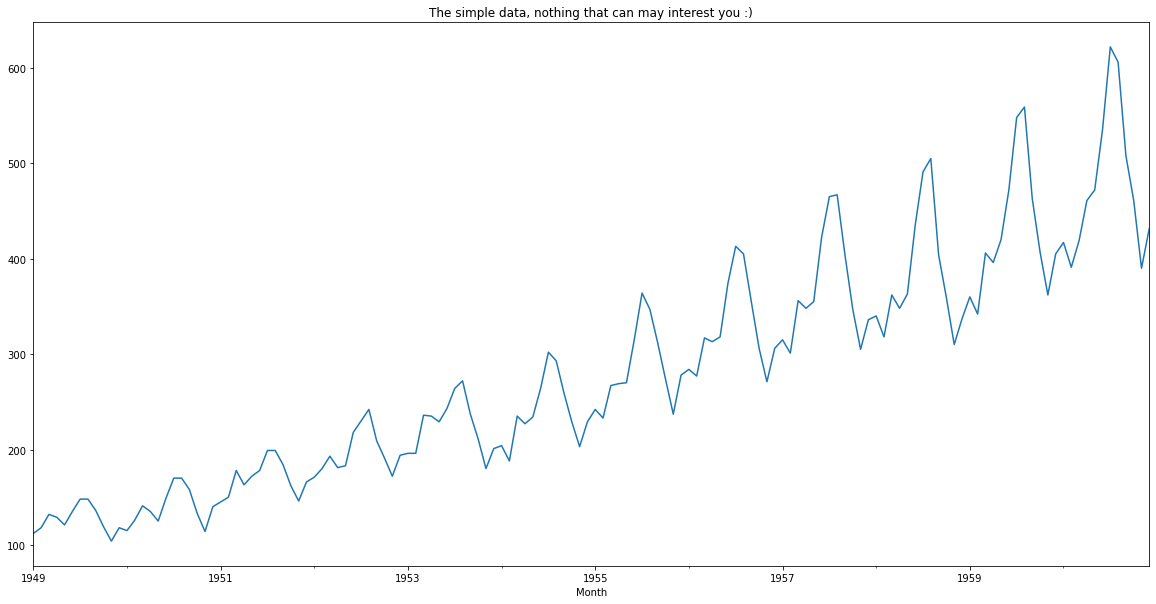

In [4]:
data.plot()
plt.title("The simple data, nothing that can may interest you :)");

In [5]:
# train and test
train_idx = data.iloc[:-12].index
test_idx = data.iloc[-12:].index

Now, recall from the previous coding notebook when we built the model **manually** and that was: `ARIMA(12, 1, 12)`. Indeed, we didn't see the RMSE but we suppose that that would have been much smaller. 

Now, here we will **let the `pmdarima` to get that optimal model** and will see how that behaves. Also noting that, `pmdarima` still has an access to the SARIMA and SARIMAX models. So we will also see how the seasonality affects that.

> **NOTE**: The exogeneous variables in new `pmdarima` package can be provided via `pmdarima.auto_arima(X=[])`. There is the arguement `X`. Before that that was `exogeneous`. So, don't try to find exogeneous there, it is renamed as X.

## 1️⃣ Simple ARIMA (no seasonality)

In [42]:
simple_autoARIMA = pm.auto_arima(data[train_idx],
                                seasonal=False,
                                stepwise=True,
                                trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1225.563, Time=0.25 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.919

See that, we have kept:
- `seasonality=False` which by default is True.
- `trace=True` which print out the model information while training different ones.
- `stepwise=True` which by default is true, but here to show that there is an option. If `False` it would go for full gridSearch and that would have taken longer time as it tests all possible combinations.

It seems like AutoARIMA has found `ARIMA(2, 1, 2)` as the best / optimal model. Also the thing to note here is that: there is **another piar** of brackets `(0, 0, 0)[0]` which shows that **we have not taken any seasonality** into consideration. So, it is simple ARIMA model 😀

#### Let's make predictions and see accuracy

In [43]:
simple_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -603.341
Date:                Fri, 12 Aug 2022   AIC                           1218.683
Time:                        17:58:55   BIC                           1235.934
Sample:                             0   HQIC                          1225.692
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7157      0.212      3.379      0.001       0.301       1.131
ar.L1          1.6431      0.028     57.904      0.000       1.587       1.699
ar.L2         -0.9129      0.027    -33.338      0.000      -0.967      -0.859
ma.L1         -1.8478      0.036    -51.463      0.000      -1.918      -1.777
ma.L2          0.9466      0.038     24.988      0.000       0.872       1.021
sigma2       564.8460     67.205      8.405      0.000     433.126     696.566
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.36   Prob(JB):                         0.39
Heteroskedasticity (H):               6.40   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

See that the AIC and BIC are also given, but again without comparision — they are useless.

In [44]:
# the .predict will take `h` values as integer to predict after the training data
# and if said `return_conf_int=True` then the confidence interval will be returned
predictions_out_sample, conf_interval = simple_autoARIMA.predict(n_periods=12, return_conf_int=True)

In [45]:
# Now, the insample predictions. This is the same as using `.fittedvalues` in ARIMA
# here we can give the zero indexed values from 0 to -1 (end of training data)
# With this function, we can also generate out-sample if the `end` is large than train

# start=1 instead of 0 is beacause the differencing is `1` in the model and it requires
# to have start more than `d`.
predictions_in_sample = simple_autoARIMA.predict_in_sample(start=1, end=-1)

#### Just to check
Whether the `.predict_in_sample` gives the same result for the *future forecast* as `.predict` or not...

In [56]:
# → with in-sample method
# → the 144 total - 12 is the period
# → and 144 - 1 is for index based correction

# just know that we are simply predicting out of the train data
# with the code written below.
simple_autoARIMA.predict_in_sample(start=144 - 12, end=144 - 1)

array([415.82068695, 442.38208784, 476.86130902, 509.98006737,
       533.63524483, 542.98322489, 537.46310847, 520.57509919,
       498.5822734 , 478.5798319 , 466.50794407, 465.64934408])

In [51]:
# this is the out-sample with .predict nmethod done already above
predictions_out_sample

array([415.82068695, 442.38208784, 476.86130902, 509.98006737,
       533.63524483, 542.98322489, 537.46310847, 520.57509919,
       498.5822734 , 478.5798319 , 466.50794407, 465.64934408])

We can see that, indeed they both end-up giving the same result. 

#### Now, let's plot them in the graph

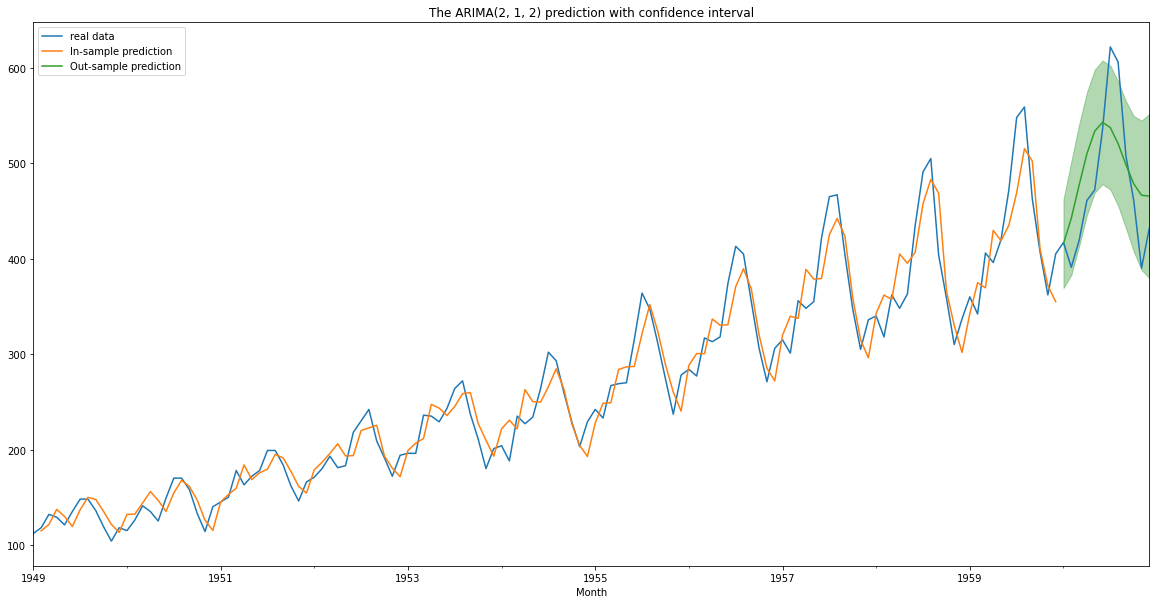

In [76]:
data.plot(label="real data")
pd.Series(predictions_in_sample, 
          index=train_idx[1:]).plot(label="In-sample prediction")

pd.Series(predictions_out_sample,
         index=test_idx).plot(label="Out-sample prediction")

plt.fill_between(test_idx, 
                 conf_interval[:, 0],
                 conf_interval[:, 1],
                 alpha=0.3,
                 color="green")

plt.legend()
plt.title("The ARIMA(2, 1, 2) prediction with confidence interval");

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
def print_error(true, pred):
    RMSE = mean_squared_error(true, pred, squared=False)
    R2 = r2_score(true, pred)
    print("RMSE:", RMSE)
    print("R2:", R2)

In [80]:
print_error(data[test_idx], predictions_out_sample)

RMSE: 53.290485964414174
R2: 0.4873381830617475


Of course, we are acting pretty badly.

## 2️⃣ Simple ARIMA (no seasonality - but with GridSearch)

We might not have given it enough time to search, so let's make `Stepwise=False`.

In [89]:
simple_autoARIMA_2 = pm.auto_arima(data[train_idx],
                                seasonal=False,
                                stepwise=False,
                                trace=True)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216

Still it gives the (2, 1, 2) as a good model. And when we see the **reason** it is because there are other parameters that we still need to mention! Have a look at the parameters.

```python
pm.auto_arima(
    ...,
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    ...,
)
```

We can see that the `max_***` are the parameters ***under which*** the auto_arima tries to find the "best" model. And they are put like `5` for `p` and `5` for `q` etc. While our data seems to follow a ***yearly cycle*** and that needs to be like `12`. 

Hence, we will need to check.

> **NOTE! ATTENTION!!**: Even if we *change* the max_p and stuff, if we don't change the `max_order` parameter, then the effect of setting max_p ***might*** not be there. Because the `max_order` signifies: "the max total of p, q, and d". 
> <br> <br> So if you have set the max_p,q,d to say like 12 and if your max_order is 5, then the model will ***never*** search for the orders like 6, 8, 12... as they will be higher than max_order.

So keep that in mind.

In [100]:
simple_autoARIMA_3 = pm.auto_arima(data[train_idx],
                                   max_p=12,
                                   max_d=3,
                                   max_q=12,
                                   max_order=15, # kept it to 15
                                   seasonal=False,
                                   stepwise=False,
                                   trace=False,
                                   error_action="ignore")

In [101]:
simple_autoARIMA_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 3)   Log Likelihood                -492.862
Date:                Fri, 12 Aug 2022   AIC                           1019.725
Time:                        19:01:00   BIC                           1068.603
Sample:                             0   HQIC                          1039.586
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1234      4.828      1.268      0.205      -3.340      15.587
ar.L1         -0.0383      0.222     -0.172      0.863      -0.473       0.397
ar.L2         -0.3248      0.169     -1.927      0.054      -0.655       0.006
ar.L3         -0.0907      0.214     -0.424      0.672      -0.510       0.329
ar.L4         -0.2907      0.151     -1.923      0.055      -0.587       0.006
ar.L5         -0.0640      0.189     -0.338      0.735      -0.435       0.307
ar.L6         -0.3188      0.151     -2.117      0.034      -0.614      -0.024
ar.L7         -0.0657      0.197     -0.333      0.739      -0.452       0.321
ar.L8         -0.3278      0.157     -2.088      0.037      -0.635      -0.020
ar.L9         -0.0604      0.193     -0.312      0.755      -0.439       0.319
ar.L10        -0.3236      0.164     -1.977      0.048      -0.644      -0.003
ar.L11        -0.0456      0.197     -0.231      0.817      -0.432       0.341
ar.L12         0.6259      0.160      3.906      0.000       0.312       0.940
ma.L1         -0.1453      0.235     -0.619      0.536      -0.605       0.314
ma.L2          0.3305      0.180      1.839      0.066      -0.022       0.683
ma.L3         -0.1863      0.218     -0.855      0.393      -0.613       0.241
sigma2        96.1868     16.059      5.990      0.000      64.712     127.662
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 9.45
Prob(Q):                              0.82   Prob(JB):                         0.01
Heteroskedasticity (H):               1.92   Skew:                            -0.13
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now, it has chosen `ARIMA(12, 1, 3)` model. Pretty complex of course but that's what it is.

#### Let's make predictions and see accuracy

In [102]:
predictions_out_sample, conf_interval = simple_autoARIMA_3.predict(n_periods=12, return_conf_int=True)

In [103]:
predictions_in_sample = simple_autoARIMA_3.predict_in_sample(start=1, end=-1)

#### Now, let's plot them in the graph

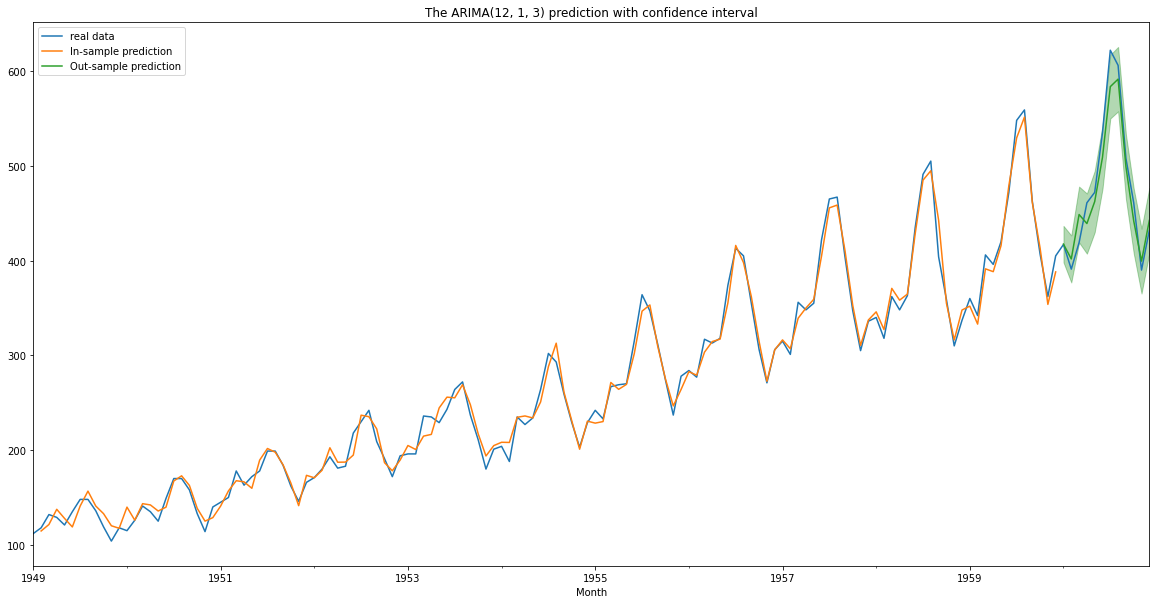

In [105]:
data.plot(label="real data")
pd.Series(predictions_in_sample, 
          index=train_idx[1:]).plot(label="In-sample prediction")

pd.Series(predictions_out_sample,
         index=test_idx).plot(label="Out-sample prediction")

plt.fill_between(test_idx, 
                 conf_interval[:, 0],
                 conf_interval[:, 1],
                 alpha=0.3,
                 color="green")

plt.legend()
plt.title("The ARIMA(12, 1, 3) prediction with confidence interval");

In [106]:
print_error(data[test_idx], predictions_out_sample)

RMSE: 19.512326697560223
R2: 0.9312694643318228


Much better!

## 3️⃣ SARIMA

In [108]:
# If you want seasonal, then you will have to provide the `m`
# m: is the seasonal period
seasonal_autoARIMA = pm.auto_arima(data[train_idx],
                                seasonal=True,
                                m=12,
                                stepwise=True,
                                max_p=12,
                                max_d=3,
                                max_q=12,
                                max_order=15, # kept it to 15
                                trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.19 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.38 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.31 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.022, Time=2.30 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.22 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.41 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.13 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.32 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

So, according to the model — we have:
1. `3rd` order autoregression
2. `1st` order seasonal difference
3. The rest of the terms are zeros

In [109]:
seasonal_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Fri, 12 Aug 2022   AIC                            905.686
Time:                                    19:06:20   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
predictions_out_sample, conf_interval = seasonal_autoARIMA.predict(n_periods=12, return_conf_int=True)

In [111]:
predictions_in_sample = seasonal_autoARIMA.predict_in_sample(start=1, end=-1)

#### Now, let's plot them in the graph

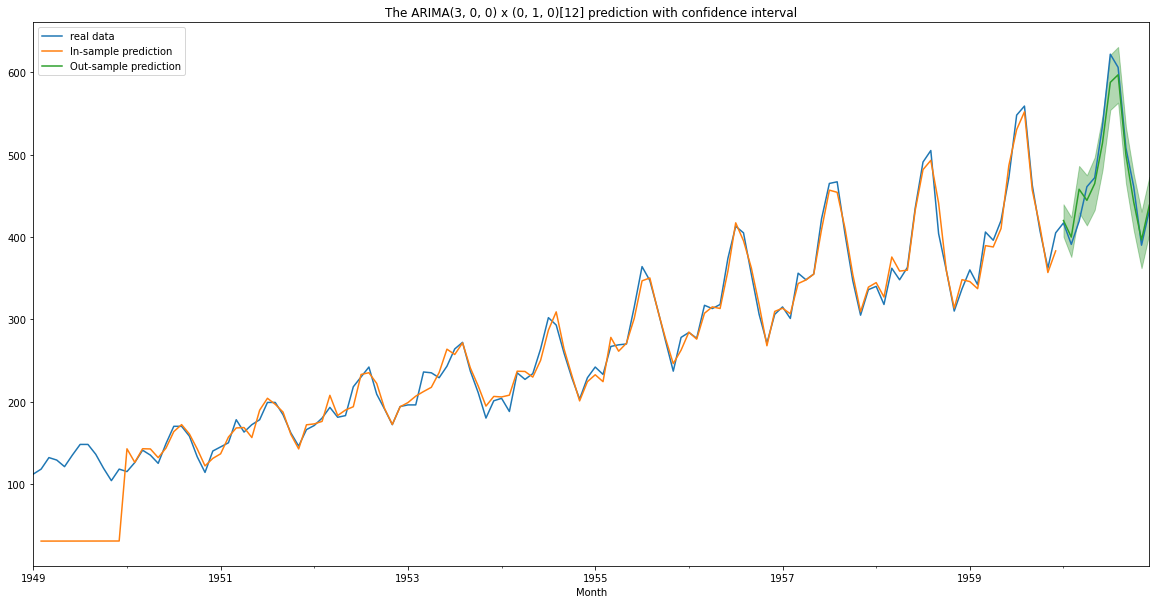

In [116]:
data.plot(label="real data")
pd.Series(predictions_in_sample, 
          index=train_idx[1:]).plot(label="In-sample prediction")

pd.Series(predictions_out_sample,
         index=test_idx).plot(label="Out-sample prediction")

plt.fill_between(test_idx, 
                 conf_interval[:, 0],
                 conf_interval[:, 1],
                 alpha=0.3,
                 color="green")

plt.legend()
plt.title("The ARIMA(3, 0, 0) x (0, 1, 0)[12] prediction with confidence interval");

In [114]:
print_error(data[test_idx], predictions_out_sample)

RMSE: 18.53646879692902
R2: 0.9379723082496686


This is the best so far! And also it has the least parameters! How crazy! <br>
Simply we have added a seasonality and our work is better!

## 4️⃣ SARIMA (with Max P, D and Q)

In [ ]:
seasonal_autoARIMA = pm.auto_arima(data[train_idx],
                                seasonal=True,
                                m=12,
                                stepwise=False,
                                max_p=12,
                                max_d=3,
                                max_q=12,
                                max_P=12,
                                max_D=3,
                                max_Q=12,
                                max_order=25, # kept it to 25 (p+P+q+Q)
                                trace=True)

I literally had to stop it, it was insane and was working for it since last 30 minutes. But, I think for now we are satisfied with the result. Indeed, the code above could have resulted in a better model.

# 

# Great stuff
Let's catch up on the next notebook where we will go over some other example on the stock data.